Number of male patients:  162
Number of male patients with diabetes:  26
Number of female patients:  228
Number of female patients with diabetes:  34


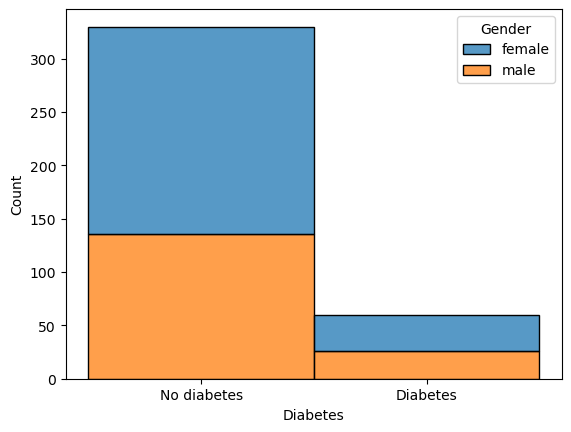

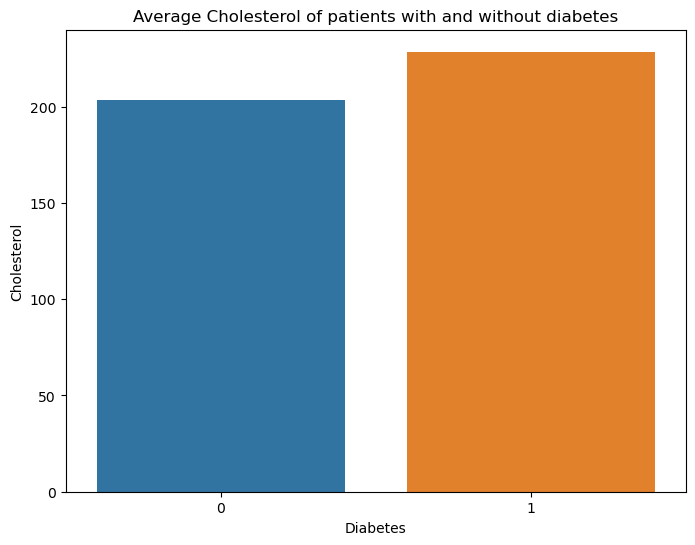

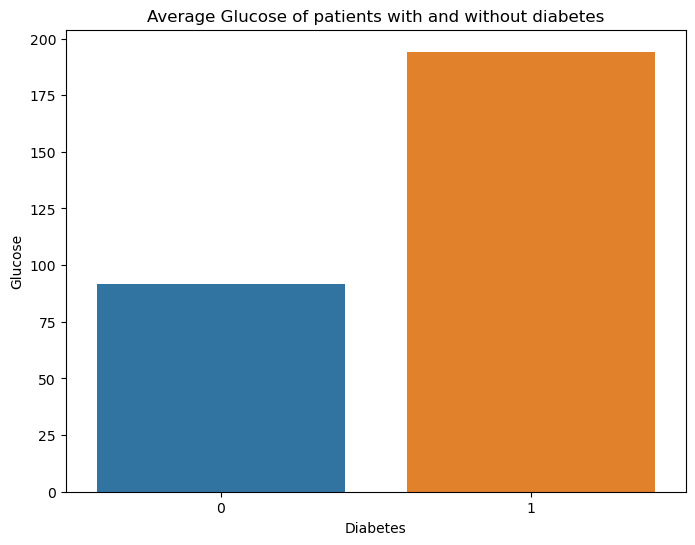

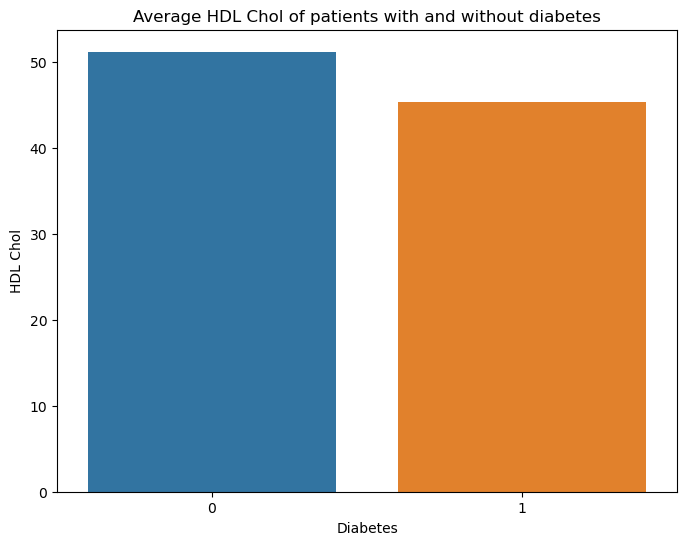

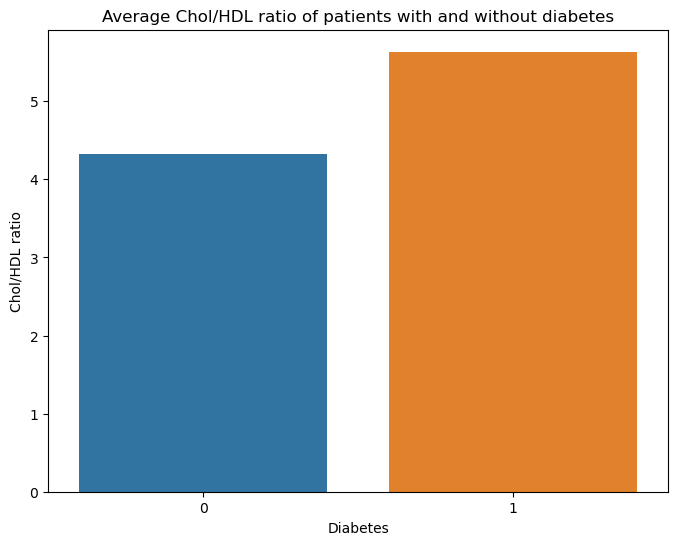

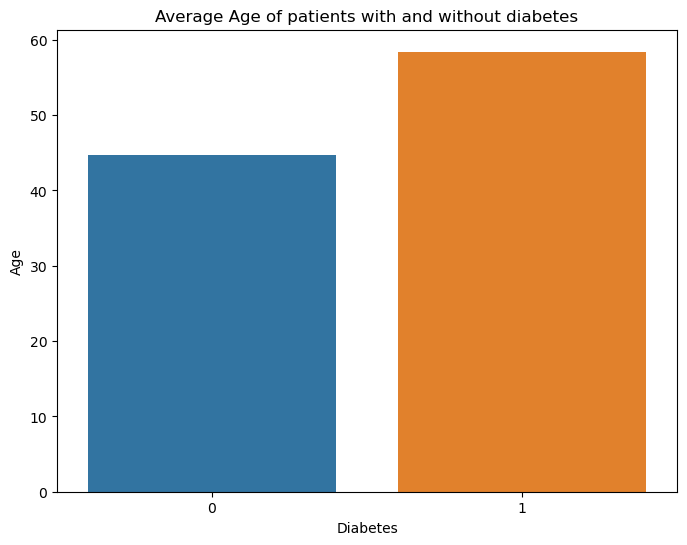

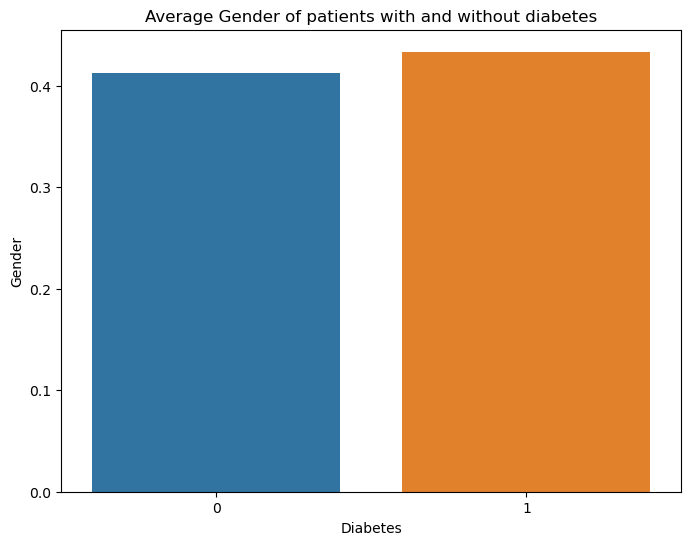

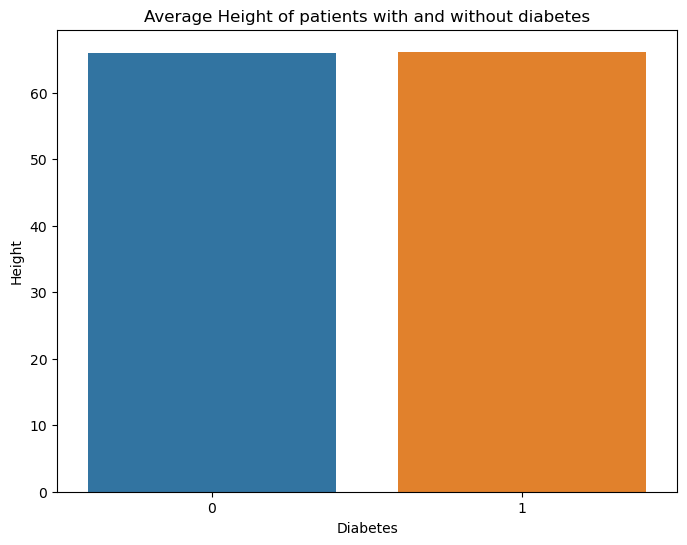

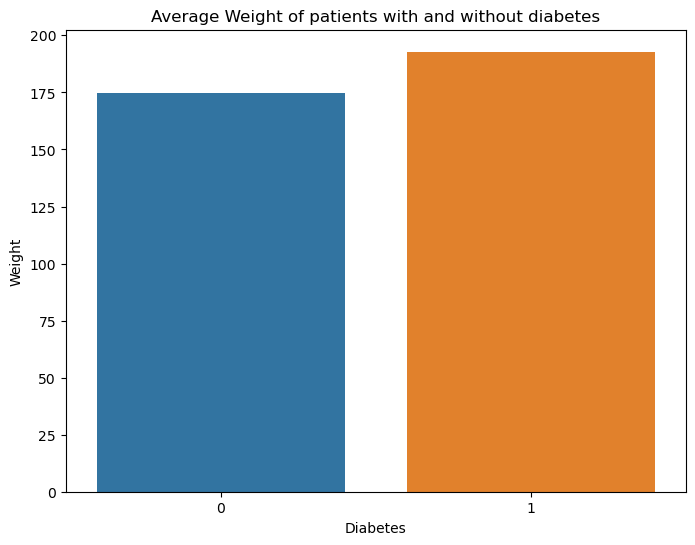

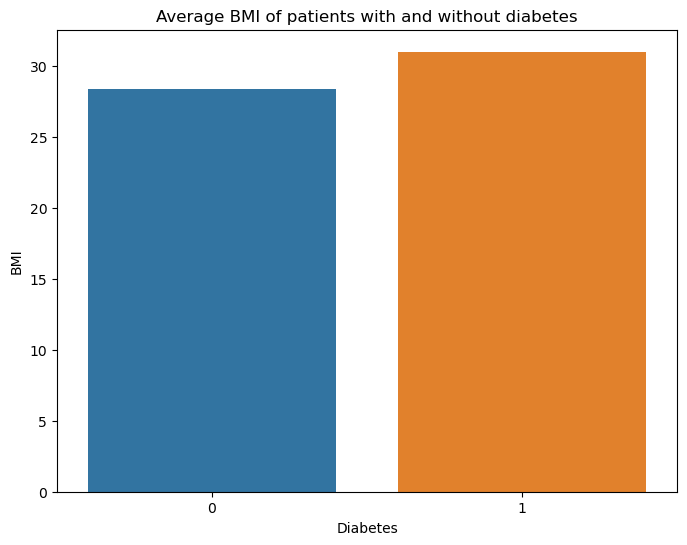

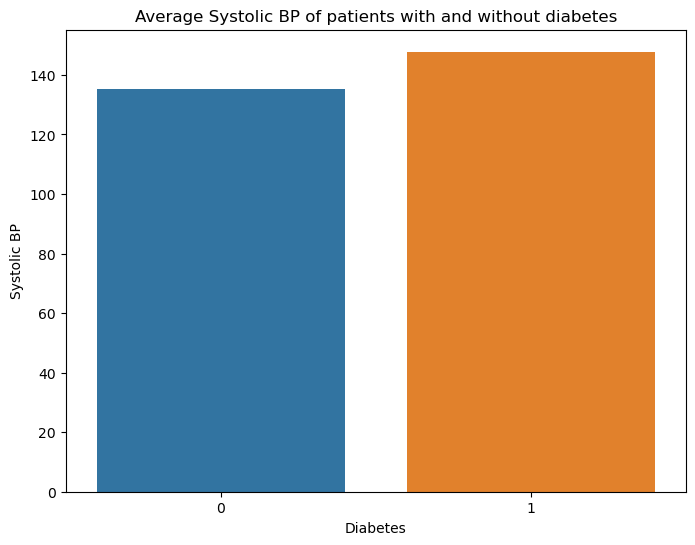

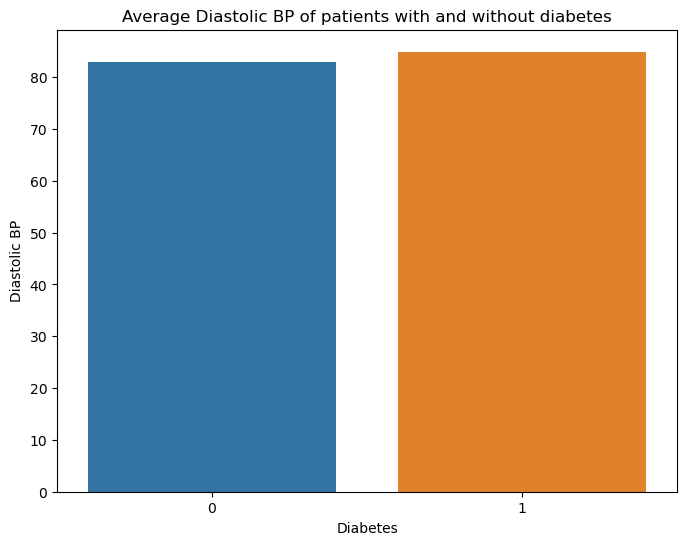

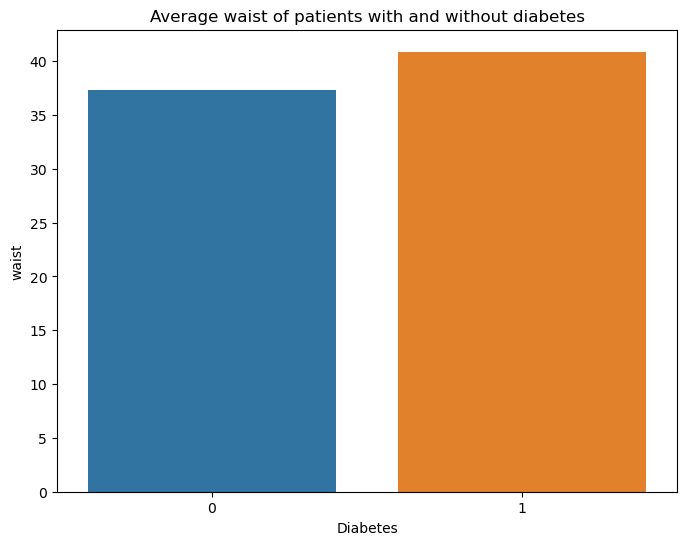

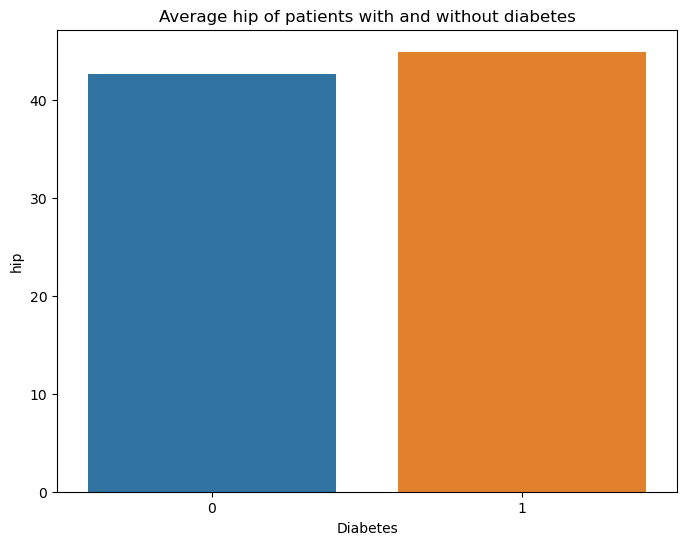

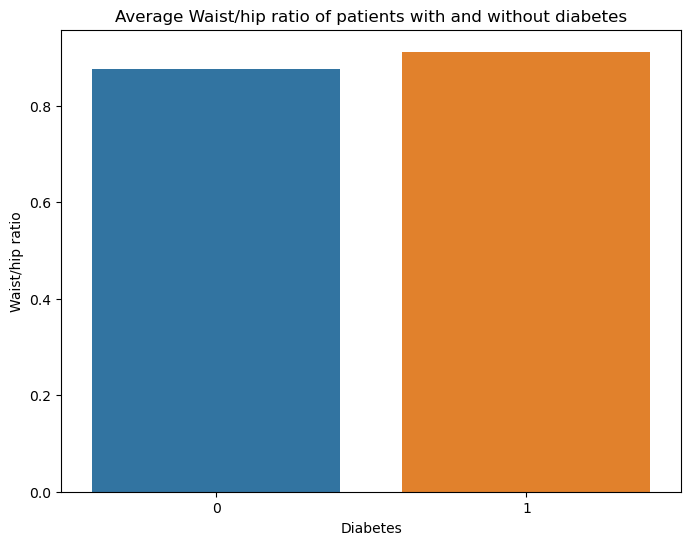

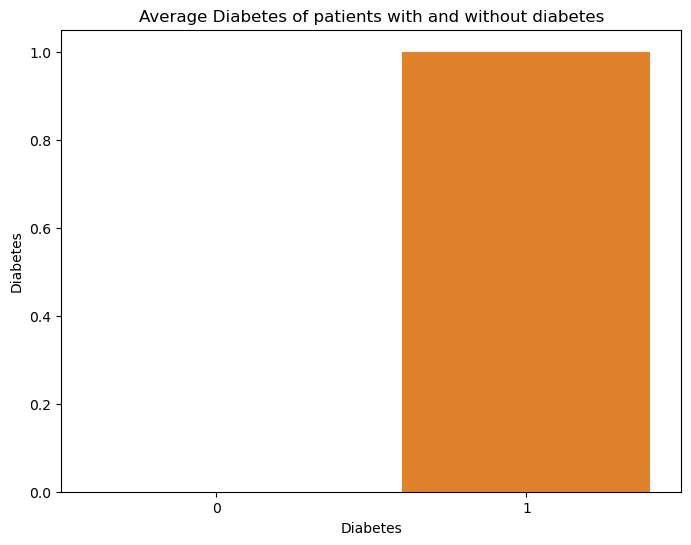

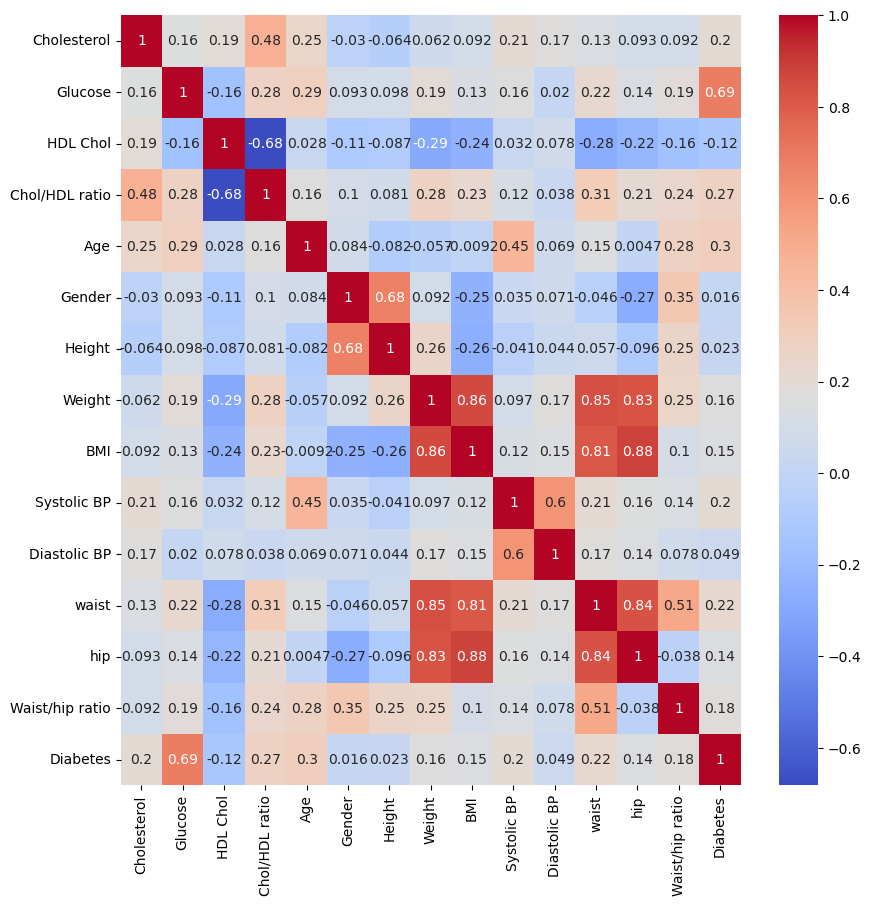

In [4]:
from tabnanny import verbose
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

data = pd.read_excel('~/workspace/datasets/Diabetes_Classification only.xlsx', sheet_name='Diabetes_Classification')
df = data.copy()

# drop the last 2 columns
df = df.drop(df.columns[[-2,-1]], axis=1)

# drop the first column
df = df.drop(df.columns[0], axis=1)

# plot the number of 'M' and 'F' patients with and without diabetes
sns.histplot(data=df, x="Diabetes", hue="Gender", multiple="stack")

# print the number of 'M' and 'F' patients with and without diabetes
print('Number of male patients: ', len(df[df['Gender'] == 'male']))
print('Number of male patients with diabetes: ', len(df[df['Gender'] == 'male'][df['Diabetes'] == 'Diabetes']))
print('Number of female patients: ', len(df[df['Gender'] == 'female']))
print('Number of female patients with diabetes: ', len(df[df['Gender'] == 'female'][df['Diabetes'] == 'Diabetes']))

# replace 'male' with 1 and 'female' with 0
df['Gender'] = df['Gender'].replace('male', 1)
df['Gender'] = df['Gender'].replace('female', 0)

# replace 'Diabetes' with 1 and 'No diabetes' with 0
df['Diabetes'] = df['Diabetes'].replace('Diabetes', 1)
df['Diabetes'] = df['Diabetes'].replace('No diabetes', 0)

# making seaborn plot of the average symptoms of the following columns
num_col = ['Cholesterol', 'Glucose', 'HDL Chol', 'Chol/HDL ratio', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Systolic BP', 'Diastolic BP', 'waist', 'hip', 'Waist/hip ratio', 'Diabetes']
for col in num_col:
    plt.figure(figsize=(8,6))
    sns.barplot(x="Diabetes",y=col,data=df,ci= False)
    plt.title("Average {} of patients with and without diabetes".format(col))
    plt.show()

# plot the correlation between the features
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


Counter({0: 330, 1: 60})
Counter({0: 330, 1: 330})


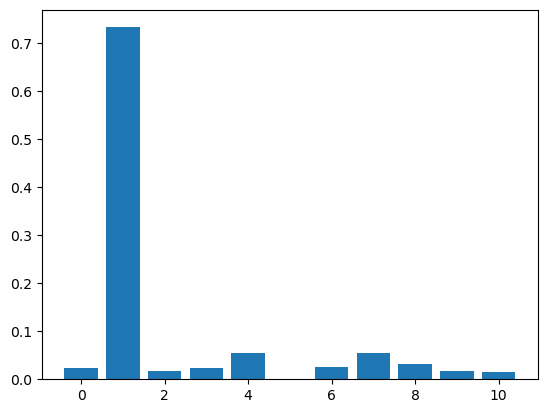

,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,BMI,Systolic BP,Diastolic BP,Waist/hip ratio
0,-0.319013,-0.564655,-0.073401,-0.360132,-1.692029,-0.842927,-1.265070,-0.951944,-0.838071,-0.985822,-0.565995
1,-1.372619,-0.527432,-0.536983,-0.533102,-1.692029,-0.842927,-1.520574,-0.360358,-1.276087,-1.875972,-0.702760
2,0.218998,-0.601879,0.216339,-0.302476,-1.631108,-0.842927,0.267951,0.079539,-1.188484,-0.837464,0.117828
3,0.420753,-0.192418,1.143504,-0.763729,-1.631108,-0.842927,-0.498560,-1.391841,-0.662865,-1.430897,-1.249818
4,-0.969111,-0.304089,0.969660,-1.224982,-1.631108,-0.842927,1.034462,-1.300828,-0.662865,0.201045,-0.839524


In [2]:
from tabnanny import verbose
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

data = pd.read_excel('~/workspace/datasets/Diabetes_Classification only.xlsx', sheet_name='Diabetes_Classification')
df = data.copy()

# drop the last 2 columns
df = df.drop(df.columns[[-2,-1]], axis=1)

# drop the first column
df = df.drop(df.columns[0], axis=1)

# drop the 'waist', 'hip', and 'Weight' columns
df = df.drop(['waist', 'hip', 'Weight'], axis=1)

# replace 'male' with 1 and 'female' with 0
df['Gender'] = df['Gender'].replace('male', 1)
df['Gender'] = df['Gender'].replace('female', 0)

# replace 'Diabetes' with 1 and 'No diabetes' with 0
df['Diabetes'] = df['Diabetes'].replace('Diabetes', 1)
df['Diabetes'] = df['Diabetes'].replace('No diabetes', 0)

# split the data into features and target
X = df.drop('Diabetes', axis = 1)
y = df['Diabetes']

# use standard scaler to scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# convert the data to a dataframe
X = pd.DataFrame(X, columns = df.columns[:-1])

# summarize class distribution
counter = Counter(y)
print(counter)

# over-sampling using SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# define the model
model = RandomForestRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

X.head()